## SETUP

In [3]:
!source ./bin/activate #activate venv; "!" indicates OS command

In [78]:
#following pip install [] in EC2

import pandas as pd #importing pandas with alias pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
#did pip install scikit-learn in EC2; now import
from sklearn.impute import SimpleImputer #impute missing values
from sklearn.preprocessing import LabelEncoder #for replacing binary values with o/1
from sklearn.compose import ColumnTransformer #for replacing nonbinary categorical values
from sklearn.preprocessing import OneHotEncoder #for encoding cat variable as binary
from sklearn.model_selection import train_test_split #for splitting train/test sets
from sklearn.tree import DecisionTreeClassifier #for building decision tree
from sklearn.metrics import accuracy_score, confusion_matrix #import functions for evaluating performance
from sklearn.tree import plot_tree #import sklearn's native tree visualizer

## IMPORT

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv") #pull raw url from github

In [13]:
data.info() #print fummary info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30 non-null     object 
 1   Age        29 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [14]:
data.head() #print df head

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [15]:
data['Salary'] #access salary column by name

0     72000.0
1     48000.0
2     54000.0
3     61000.0
4         NaN
5     58000.0
6     52000.0
7     79000.0
8     83000.0
9     67000.0
10    49000.0
11    75000.0
12    56000.0
13    77000.0
14    51000.0
15    85000.0
16        NaN
17    55000.0
18    63000.0
19    80000.0
20    47000.0
21    53000.0
22    71000.0
23    82000.0
24    57000.0
25    74000.0
26    88000.0
27    78000.0
28    45000.0
29    90000.0
Name: Salary, dtype: float64

In [16]:
data[["Country","Age"]] #access two columns

,Country,Age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0


In [17]:
#ilocation (iloc) selecting columns by location (row, column)
#data.iloc[:,0:2] #all rows, columns 0:2 
#data.iloc[1:,:] #first to last row; all columns
#data.iloc[:,0] #all rows, first column (as "0")
data.iloc[0,:]

Country       France
Age             44.0
Salary       72000.0
Purchased         No
Name: 0, dtype: object

## PREPARE FOR MODEL

In [84]:
#separate input/output data (features/labels)
input_features = data.iloc[:,0:3].values #select first three columns, convert to array with .values
label = data.iloc[:,-1].values #select as lastmost column

In [99]:
# create tool to impute missing values (just replace w means)
mck_impute = SimpleImputer(missing_values=np.nan, strategy = "mean")
mck_impute2 = SimpleImputer(missing_values= "0", strategy = "mean")
# then calculate missing values
mck_impute.fit(input_features[:,1:3])

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [86]:
input_features[:,1:3] = mck_impute.transform(input_features[:,1:3]) #replace values with df including imputed mean values

In [87]:
input_features #looks good

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 66071.42857142857],
       ['France', 35.0, 58000.0],
       ['Spain', 39.0, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0],
       ['Germany', 28.0, 49000.0],
       ['France', 42.0, 75000.0],
       ['Spain', 33.0, 56000.0],
       ['Germany', 45.0, 77000.0],
       ['France', 29.0, 51000.0],
       ['Spain', 51.0, 85000.0],
       ['Germany', 36.0, 66071.42857142857],
       ['France', 31.0, 55000.0],
       ['Spain', 39.0, 63000.0],
       ['Germany', 47.0, 80000.0],
       ['France', 26.0, 47000.0],
       ['Spain', 32.0, 53000.0],
       ['Germany', 41.0, 71000.0],
       ['France', 49.0, 82000.0],
       ['Spain', 34.0, 57000.0],
       ['Germany', 43.0, 74000.0],
       ['France', 52.0, 88000.0],
       ['Spain', 46.0, 78000.0],
       ['Germany', 25.0, 450

In [88]:
label # no missing values, no changes necessary

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
      dtype=object)

In [89]:
# model will need numeric values (change binary purchase field to 0/1)
le = LabelEncoder()
label = le.fit_transform(label)
print(label)
print(input_features)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 66071.42857142857]
 ['France' 35.0 58000.0]
 ['Spain' 39.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 66071.42857142857]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]


In [90]:
# preprocessing for Country field
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough') #specify encoding process: specify firstcolumn [0]

In [91]:
input_features = np.array(ct.fit_transform(input_features))
print(input_features) #added 4 new columns encoding Country variable
#now have serviceable input/output data for ML training 

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 66071.42857142857]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 39.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 28.0 49000.0]
 [1.0 0.0 0.0 42.0 75000.0]
 [0.0 0.0 1.0 33.0 56000.0]
 [0.0 1.0 0.0 45.0 77000.0]
 [1.0 0.0 0.0 29.0 51000.0]
 [0.0 0.0 1.0 51.0 85000.0]
 [0.0 1.0 0.0 36.0 66071.42857142857]
 [1.0 0.0 0.0 31.0 55000.0]
 [0.0 0.0 1.0 39.0 63000.0]
 [0.0 1.0 0.0 47.0 80000.0]
 [1.0 0.0 0.0 26.0 47000.0]
 [0.0 0.0 1.0 32.0 53000.0]
 [0.0 1.0 0.0 41.0 71000.0]
 [1.0 0.0 0.0 49.0 82000.0]
 [0.0 0.0 1.0 34.0 57000.0]
 [0.0 1.0 0.0 43.0 74000.0]
 [1.0 0.0 0.0 52.0 88000.0]
 [0.0 0.0 1.0 46.0 78000.0]
 [0.0 1.0 0.0 25.0 45000.0]
 [1.0 0.0 0.0 53.0 90000.0]]


In [92]:
training_input, testing_input, train_label, test_label = train_test_split(input_features, label, test_size = 0.1) #split train/test sets

In [93]:
print(testing_input)

[[0.0 0.0 1.0 51.0 85000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 42.0 75000.0]]


In [73]:
#build classifier w default params
dec_classifier = DecisionTreeClassifier()

In [74]:
#"train" classifier
trained_model = dec_classifier.fit(training_input, train_label)

# TEST AND EVALUATE MODEL

In [75]:
# use "trained" model to make predicitions
predicted_values = trained_model.predict(testing_input)

In [76]:
print(predicted_values)
print(test_label)
# 66% accuracy

#or use a tool:
accuracy_score(test_label, predicted_values)
confusion_matrix(test_label, predicted_values)

[1 0 0]
[1 0 1]


array([[1, 0],
       [1, 1]])

In [69]:
#now generate some predictions about randomly-constructed; needs impute, passthrough to classifier for homework
new_data = np.array([["Spain","39","51000"]])
print(new_data)

[['Spain' '39' '51000']]


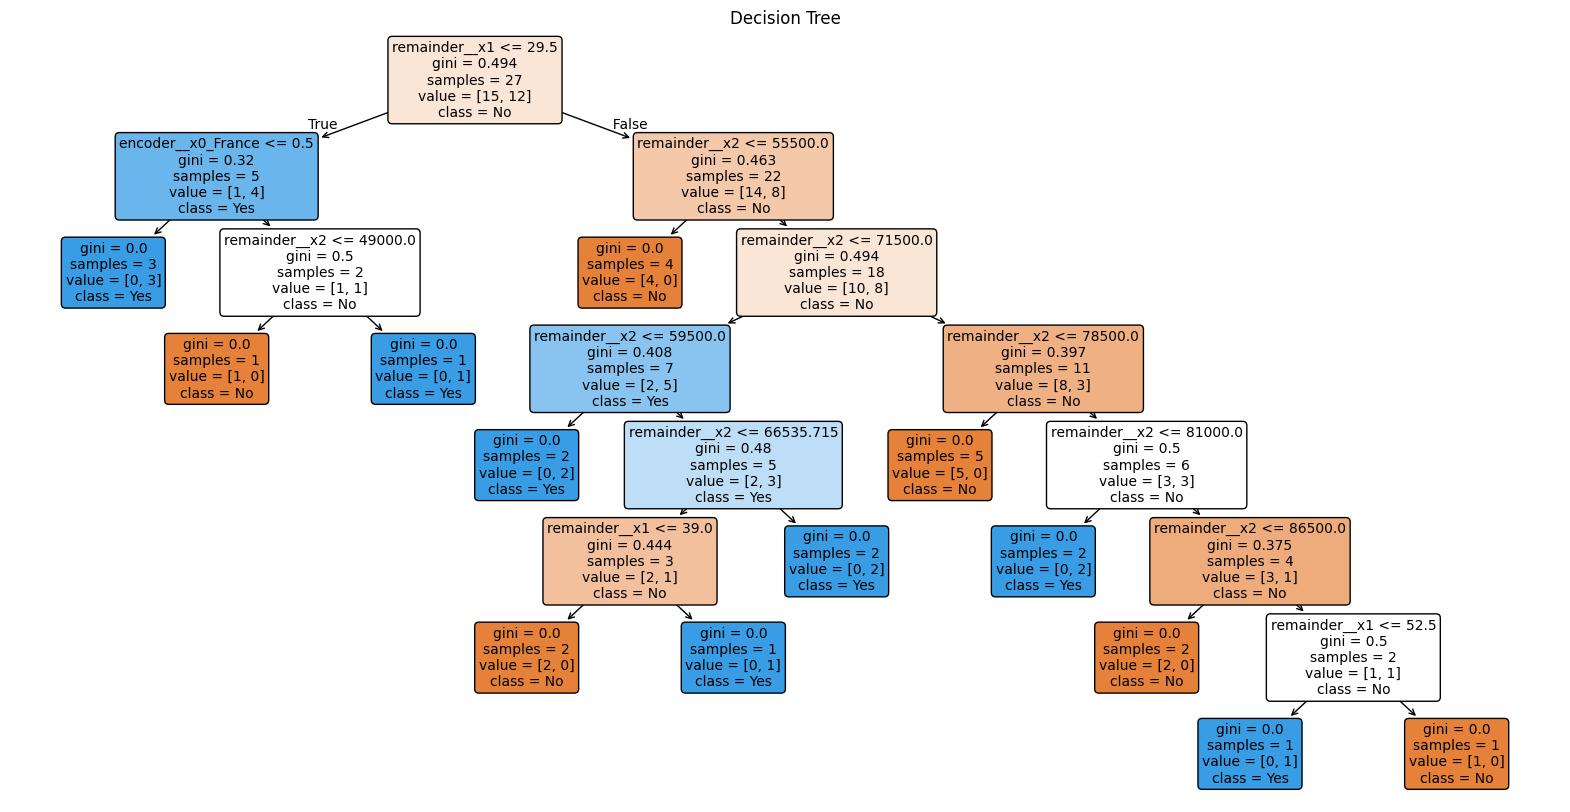

In [98]:
plt.figure(figsize=(20,10))
plot_tree(dec_classifier,
         feature_names=ct.get_feature_names_out(),
         class_names=le.classes_,
         filled = True,
         fontsize=10,
         rounded=True) #pass classifier, lable/feature names
plt.title("Decision Tree")
plt.show()

In [80]:
le.classes_ #print names of classes

array(['No', 'Yes'], dtype=object)

In [95]:
ct.get_feature_names_out()

array(['encoder__x0_France', 'encoder__x0_Germany', 'encoder__x0_Spain',
       'remainder__x1', 'remainder__x2'], dtype=object)

In [77]:
#do some more preprocessing on startups df
startups = pd.read_csv("https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/Startups_Data.csv")

In [32]:
startups.iloc[:,3].values

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

In [132]:
input_features2 = startups.iloc[:,0:5].values #select first three columns, convert to array with .values
label2 = startups.iloc[:,-1].value

AttributeError: 'Series' object has no attribute 'value'

## SETUP